# BCI homework

# Brain-Computer Interfaces (Fall 2017, ELE 594)
# Instructor: Yalda Shahriari

# 1st homework, 9/23/17 (The homework, is due by Oct 4, 11:55 pm).

# Instruction: 
Load the “sampleEEGdata” into your Matlab workspace. 
This EEG dataset contains 64 channels (EEG.nbchan), 640 time points (EEG.pnts), and 99 trials (EEG.trials). 
The time points in ms has been saved in EEG.times where you can see each trial has been started 
from -1000 ms and ends at ~1500 ms. 
Use the topoplot.m function for plotting the head plots. 
Save the ‘eloc64C2.txt’ file in the same directory as the topoplot.m function for further analysis. 

In [1]:
# Here are the functions, 
# which reconstructs the dictionaries just use this loadmat instead of scipy.io's loadmat:

import scipy.io as spio
import numpy as np

sampleEEGdata = spio.loadmat('sampleEEGdata.mat')  #.loa ('sampleEEGdata.mat')
# sampleEEGdata['EEG'][0, 0].dtype
eeg = sampleEEGdata['EEG'][0, 0]
eeg.dtype

dtype([('setname', 'O'), ('filename', 'O'), ('filepath', 'O'), ('subject', 'O'), ('group', 'O'), ('condition', 'O'), ('session', 'O'), ('comments', 'O'), ('nbchan', 'O'), ('trials', 'O'), ('pnts', 'O'), ('srate', 'O'), ('xmin', 'O'), ('xmax', 'O'), ('times', 'O'), ('data', 'O'), ('icaact', 'O'), ('icawinv', 'O'), ('icasphere', 'O'), ('icaweights', 'O'), ('icachansind', 'O'), ('chanlocs', 'O'), ('urchanlocs', 'O'), ('chaninfo', 'O'), ('ref', 'O'), ('event', 'O'), ('urevent', 'O'), ('eventdescription', 'O'), ('epoch', 'O'), ('epochdescription', 'O'), ('reject', 'O'), ('stats', 'O'), ('specdata', 'O'), ('specicaact', 'O'), ('splinefile', 'O'), ('icasplinefile', 'O'), ('dipfit', 'O'), ('history', 'O'), ('saved', 'O'), ('etc', 'O'), ('spedata', 'O')])

In [2]:
# Use the topoplot.m function for plotting the head plots.
# Creating mne Objects from numpy arrays for Visualizing the epochs/ topomap plot
import mne as mne

labels = []
XYZs = []
eeg['chanlocs']['labels'][0, 0][0]
eeg['chanlocs']['labels'].shape[1]
for idx in range(eeg['chanlocs']['labels'].shape[1]):
    # channel labels or electrode labels
    label = eeg['chanlocs']['labels'][0, idx][0]
    #     print(label)
    labels.append(label)
    
    # channel location or electrode location
    X = eeg['chanlocs']['X'][0, idx][0][0]
    Y = eeg['chanlocs']['Y'][0, idx][0][0]
    Z = eeg['chanlocs']['Z'][0, idx][0][0]
    XYZs.append(np.array([X, Y, Z], dtype=float))

ch_location = np.array(XYZs, dtype=float) # channels or electrodes location
ch_names = labels # mat['ch_names'].tolist(): channels or electrodes names/ labels
dig_ch_pos = dict(zip(ch_names, ch_location))
montage = mne.channels.DigMontage(dig_ch_pos=dig_ch_pos)

sfreq = eeg['srate'][0, 0]

# It is also possible to use info from another raw object.
info = mne.create_info(ch_names=ch_names, ch_types='eeg', montage=montage, sfreq=sfreq)

# eeg['data'][0, 0, 0]: channels, time, epochs
data = eeg['data'].transpose(2, 0, 1) # epcohs/ trials, channels, time
# data.shape  # data : array, shape (n_epochs, n_channels, n_times)

tmin = eeg['xmin'][0, 0]
tmax = eeg['xmax'][0, 0]
picks = mne.pick_types(info=info, eeg=True)

# Visualizing the epochs/ topomap plot
epochs = mne.EpochsArray(data=data, info=info, tmin=tmin)

# Shrinking the data from 3 axis or 3 dim to 2 dim or getting rid of epochs/trials
evoked = epochs.average(picks=picks)
data2 = evoked.data
data2.shape

99 matching events found
0 projection items activated
0 bad epochs dropped


(64, 640)

In [3]:
# Save the ‘eloc64C2.txt’ file in the same directory as the topoplot.m function for further analysis.
% ls

Analyzing_Neural_Time_Series/  bci-hw1-Copy4.ipynb       eloc64C2.txt*
bci-hw1-2-mandatory.ipynb      bci-hw1-Copy5.ipynb       HW1.pdf
bci-hw1-2-optional.ipynb       bci-hw1-Copy6.ipynb       mne_examples/
bci-hw1-Copy10.ipynb           bci-hw1-Copy7.ipynb       README
bci-hw1-Copy1.ipynb            bci-hw1-Copy8.ipynb       sampleEEGdata.mat*
bci-hw1-Copy2.ipynb            bci-hw1.ipynb             topoplot.m*
bci-hw1-Copy3.ipynb            Channel Description.txt*


# 1-

a) Extract epochs from 0 to 800 ms.

Compute the ERPs at each electrode.
ERP: Event-related Potentials
ERF: Event-related Field

Get the average over all the trials. 

Select nine time points at which to show topographical plots (e.g., 0 to 800 ms in 100- ms steps). 

In one figure, make a series of topographical plots at these time points. 

To increase the signal-to-noise ratio (SNR), make each plot show the average of activity from 20 ms before 
until 20 ms after each time point. 

For example, the topographical plot from 200 ms should show average activity from 180 ms until 220 ms. 

Indicate the center time point in a title on each subplot., tmax

(64, 204)


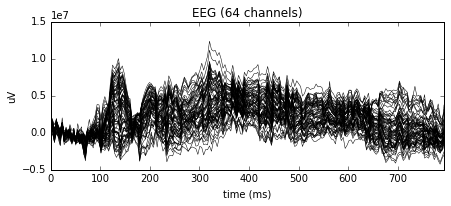

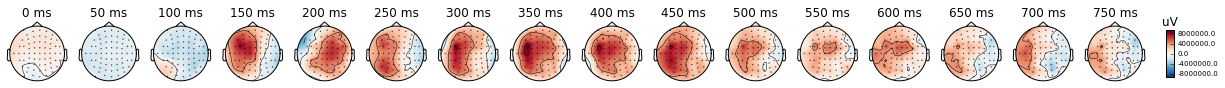

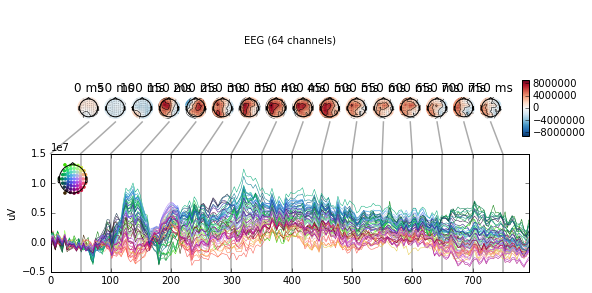

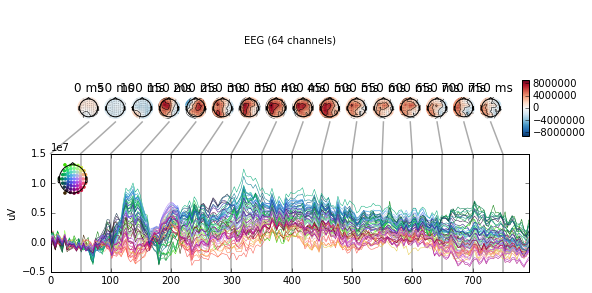

In [5]:
# data.shape, tmin, tmax, sfreq
# 1/ eeg['srate'] is time distance or period between each point
# the window limit, lower limit and the upper limit for extracting the pochs
tmin, tmax = 0.0, 0.792969 # slightly less than 0.8
roi_low, roi_length = 1.0 * sfreq, 0.8 * sfreq
roi_low, roi_length = int(roi_low), int(roi_length)
roi_low, roi_length, data.shape, (roi_low + roi_length)

# # data_extracted using the lower limit and upper limit of the region of interest (ROI) or window of interest
data3 = data2[:, roi_low: (roi_low + roi_length)]
print(data3.shape)

# for idx in range(num_steps):
evoked = mne.EvokedArray(data=data3, info=info) 
evoked.plot(picks=picks) # This kills it or empty out the data
times = np.arange(0.0, 0.79, 0.05)
evoked.plot_topomap(times)
evoked.plot_joint(times)

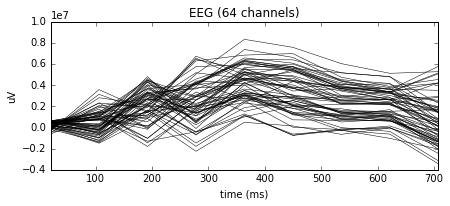

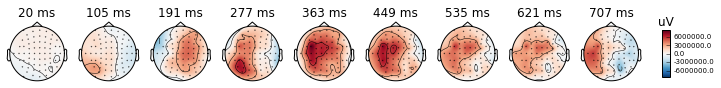

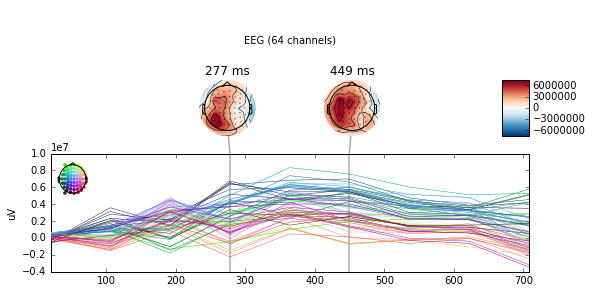

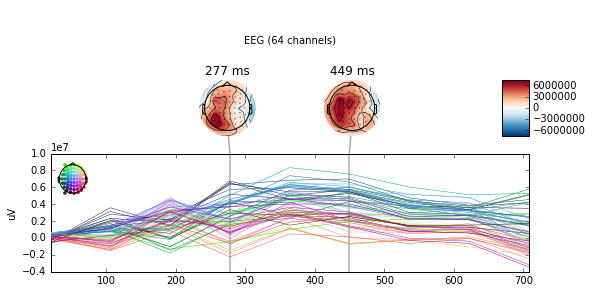

In [6]:
# Shrink the data to 64 x 8
# this is only one epoch/ averaged epoch of all epochs
num_samples = data3.shape[1] # chxtime or hxw
# print(num_samples)
num_steps = 9
step_size = num_samples // num_steps
# print(step_size, num_samples)
margin = int(0.02 * sfreq)
# print(margin)

data4 = []
times = []
for idx in range(num_steps):
    data = data3[:, (idx * step_size) : (idx * step_size) + (2 * margin)]
    data4.append(data)
    time = (idx * step_size * (1/ sfreq)) + 0.02
    times.append(time)
#     print(time)

data4 = np.array(data4, dtype=float).transpose(2, 0, 1).mean(axis=0).T
# print(data4.shape)
times = np.array(times, dtype=float)
# # print(times.shape)

# for idx in range(num_steps):
evoked = mne.EvokedArray(data=data4, info=info) 
evoked.times = times
evoked.plot(picks=picks) # This kills it or empty out the data

# # picks
# # print(data4.shape[0])
# # Show the topoplot at every 9 timestamps
# # times = evoked.times.copy()
evoked.plot_topomap(times=times)
evoked.plot_joint()

b) Loop through each electrode and find the peak time of the ERP between 100 and 800 ms.

Store these peak times in a separate variable and then make a topographical plot of the peak times
(that is, the topographical map will illustrate times in milliseconds, not activity at peak times).

Include a color bar in the figure and make sure to show times in milliseconds from time 0 (not, for
example, time indices instead of milliseconds).

What areas of the scalp show the earliest and the latest peak responses to the stimulus within this window?


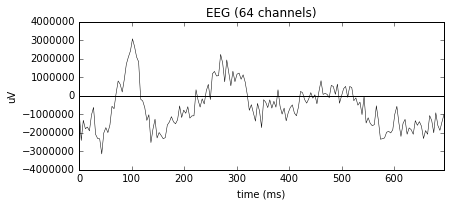

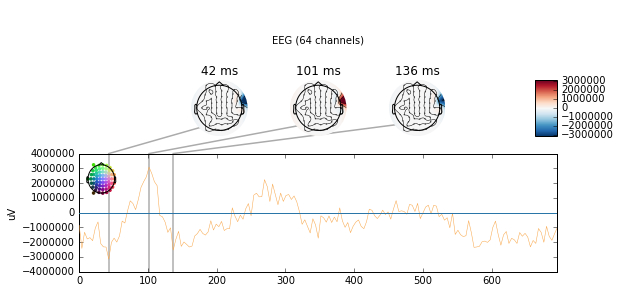

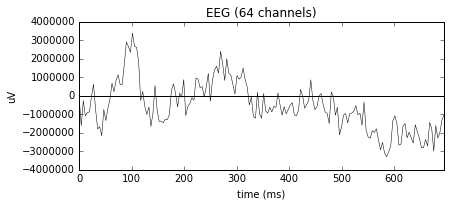

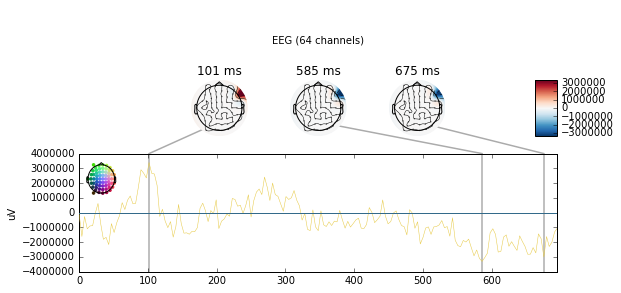

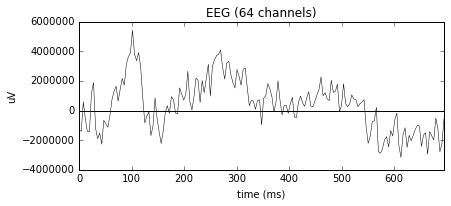

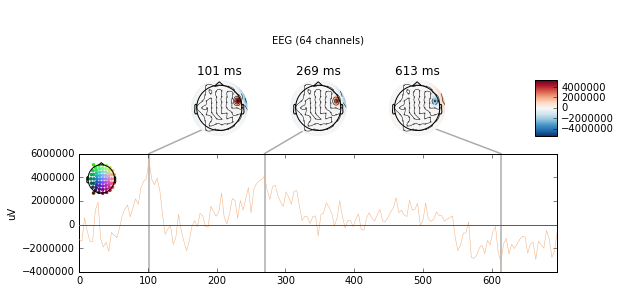

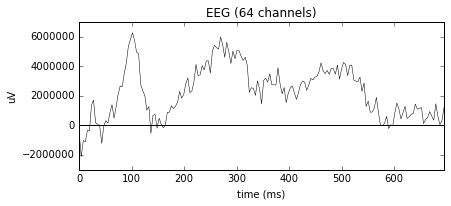

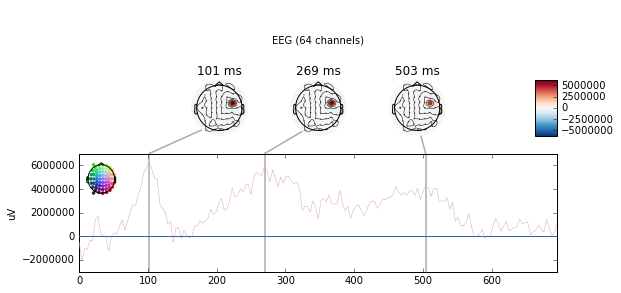

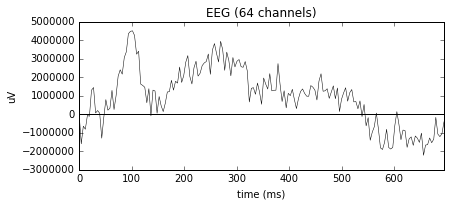

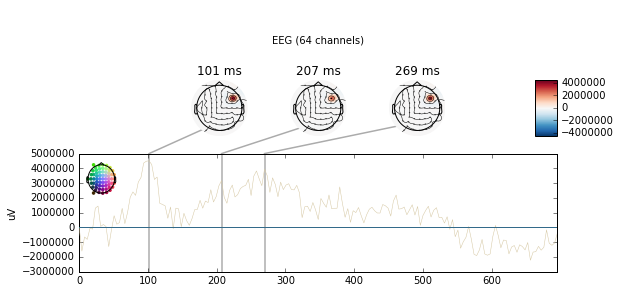

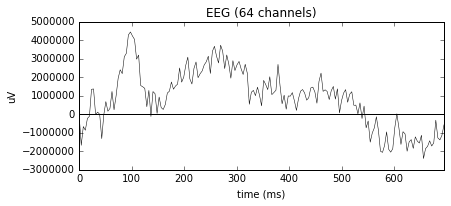

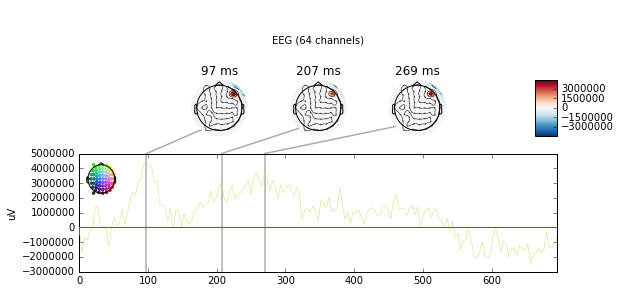

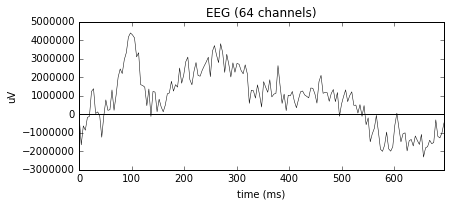

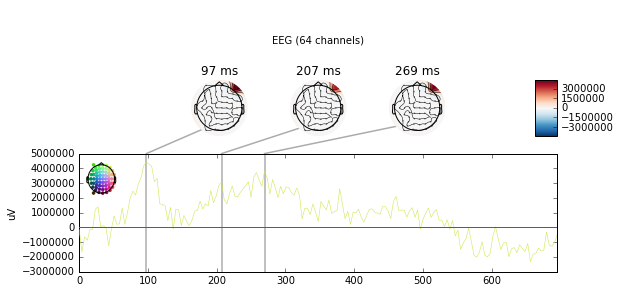

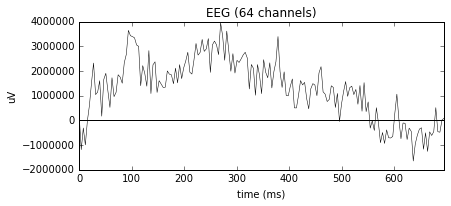

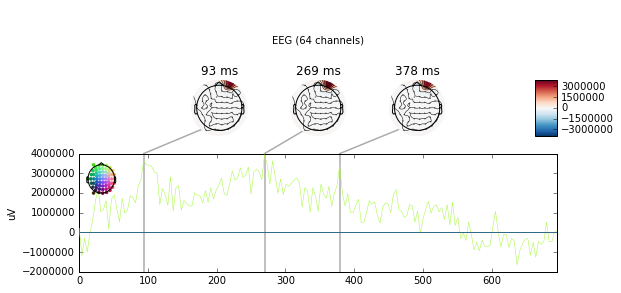

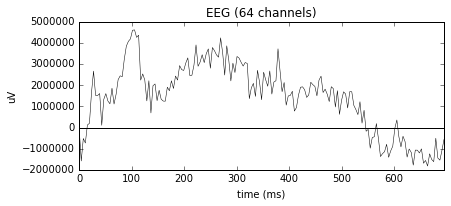

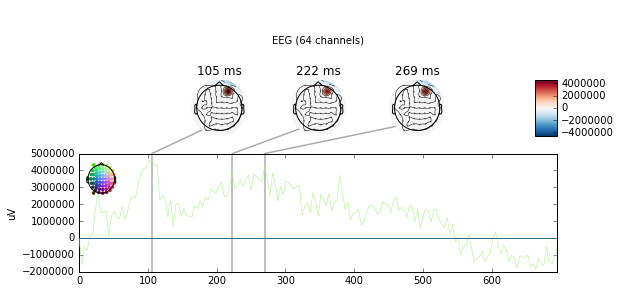

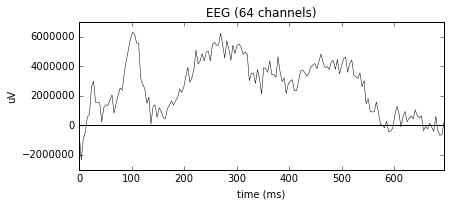

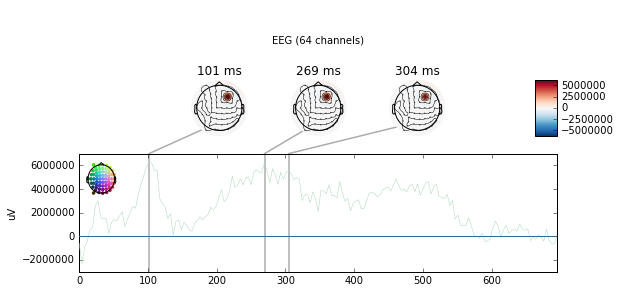

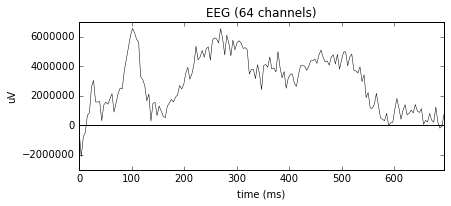

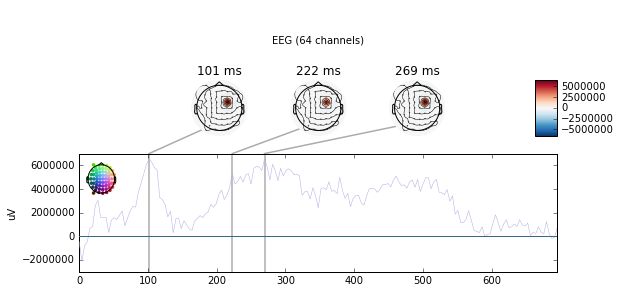

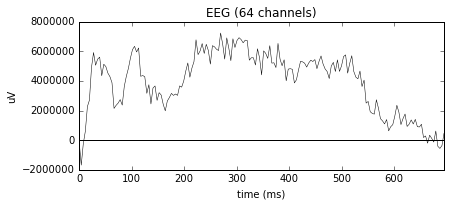

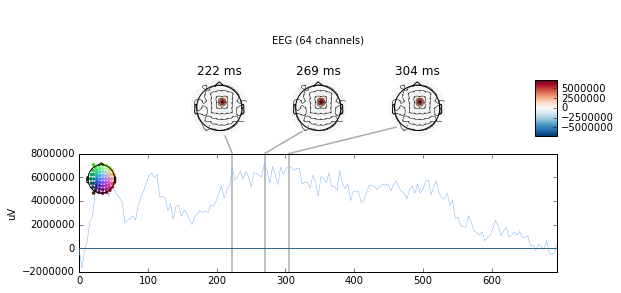

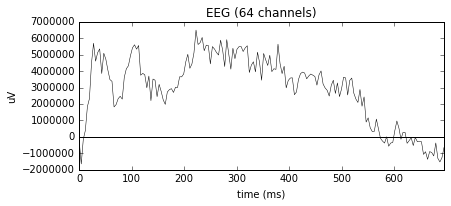

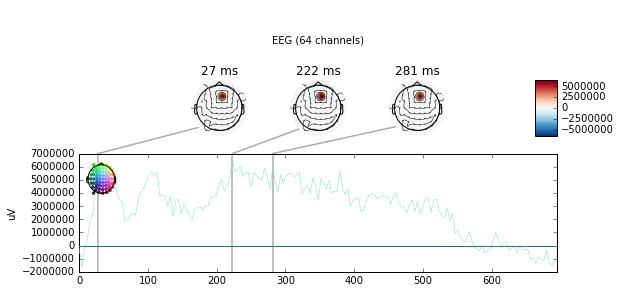

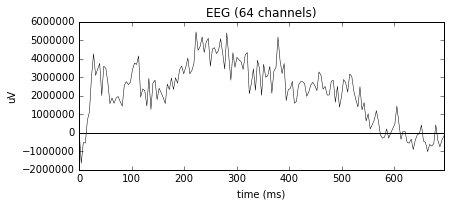

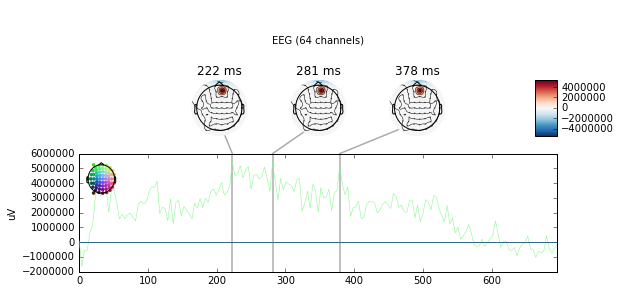

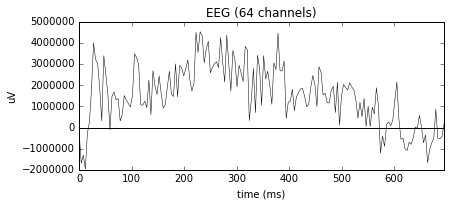

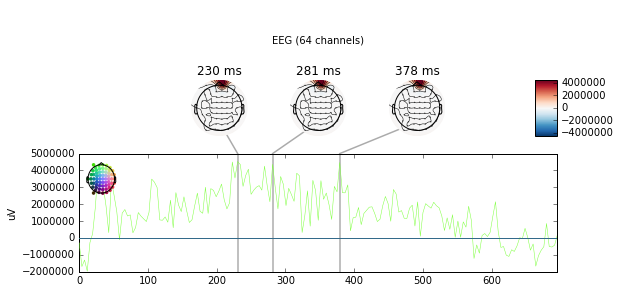

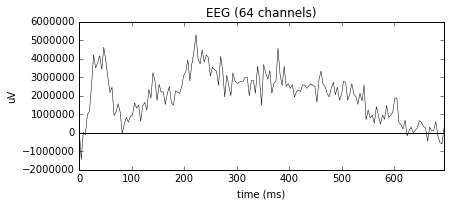

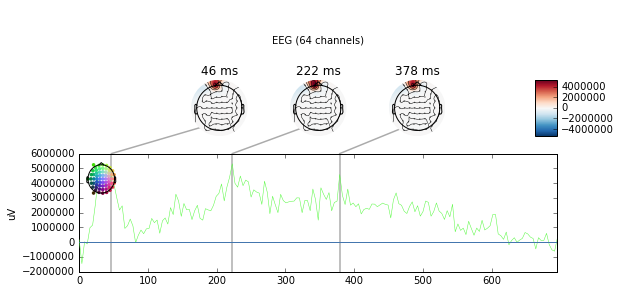

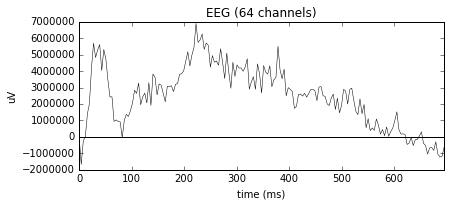

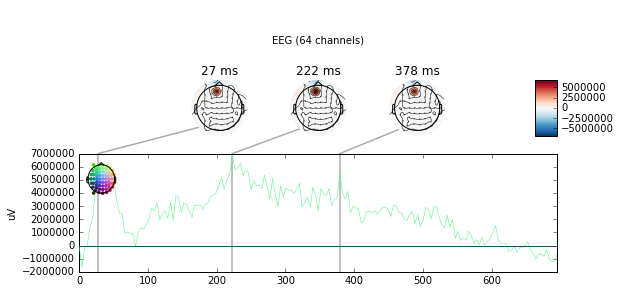

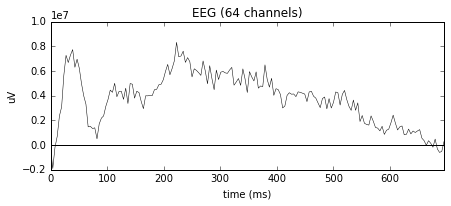

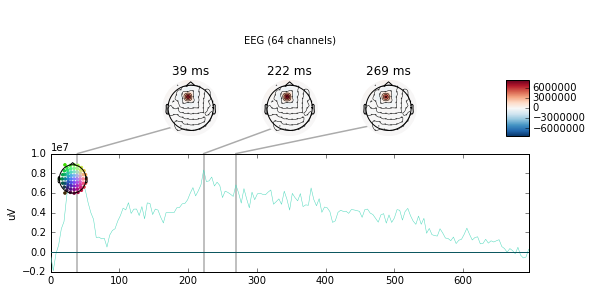

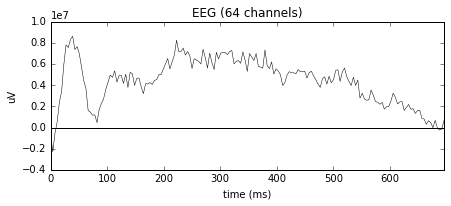

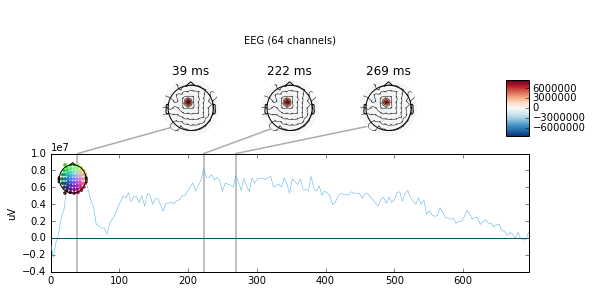

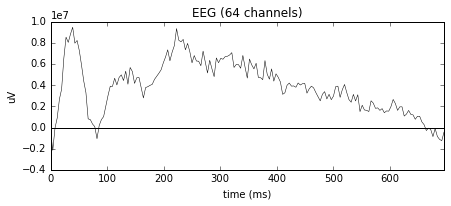

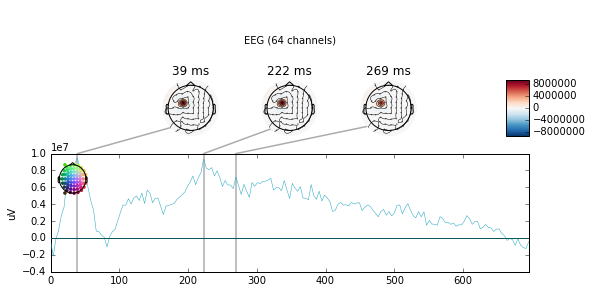

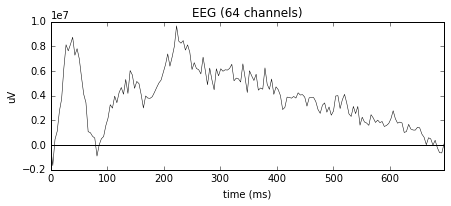

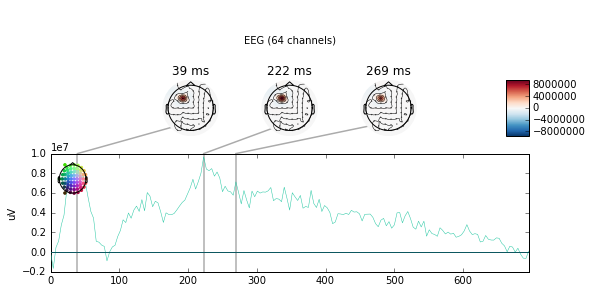

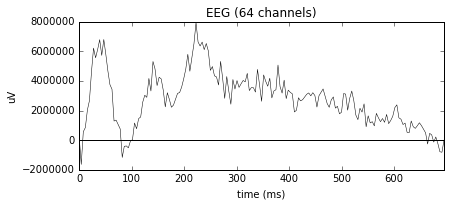

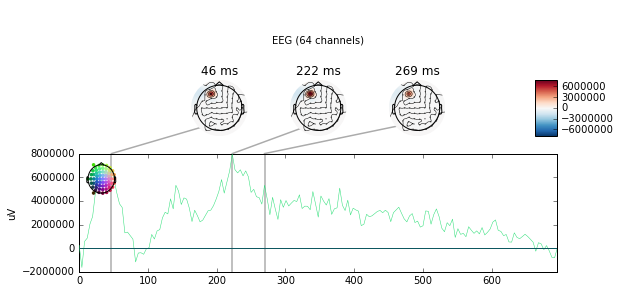

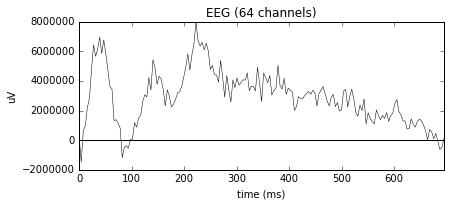

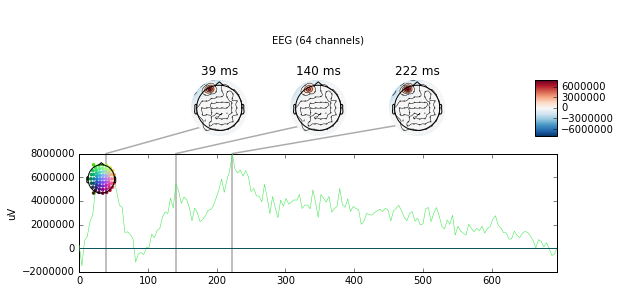

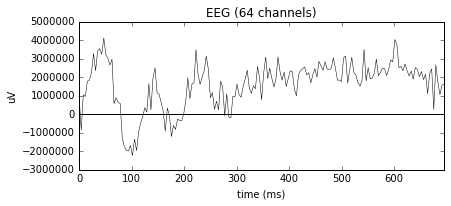

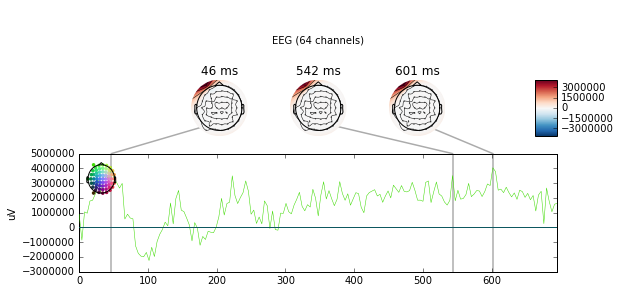

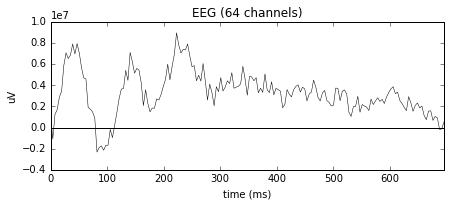

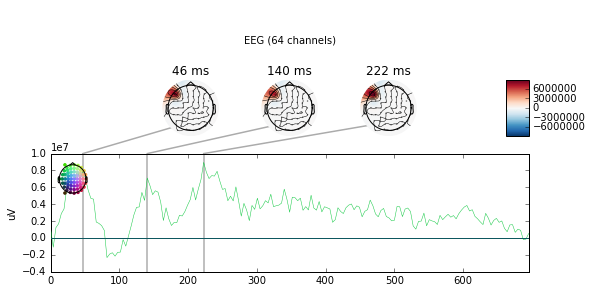

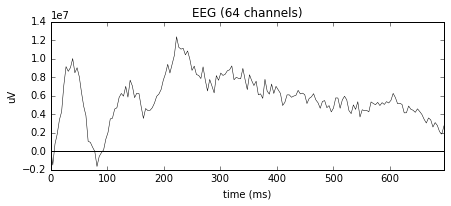

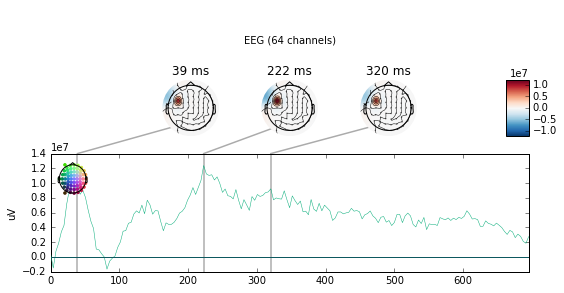

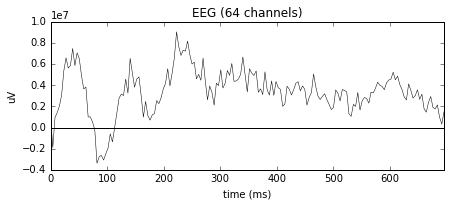

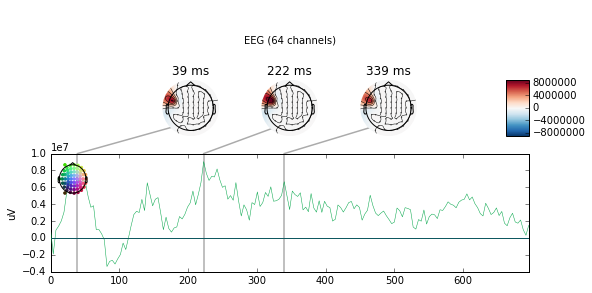

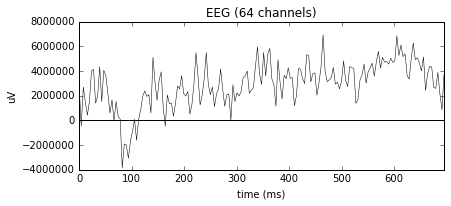

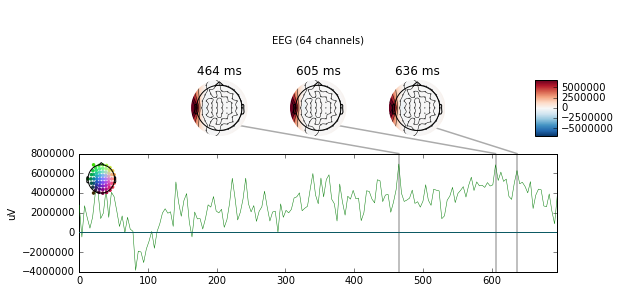

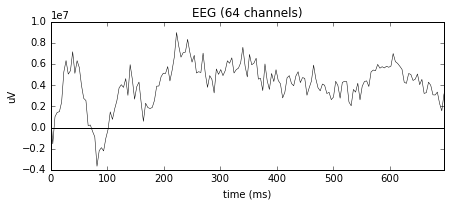

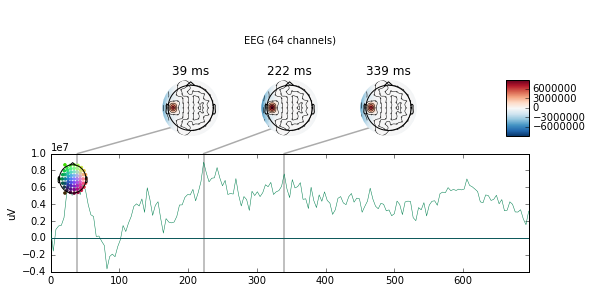

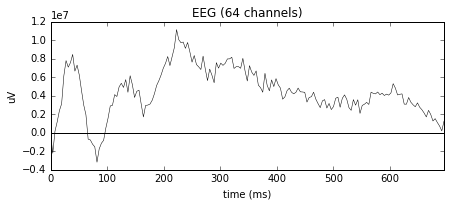

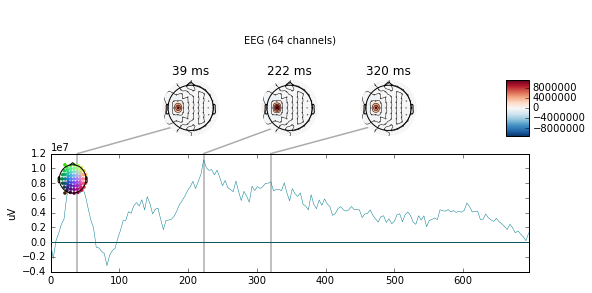

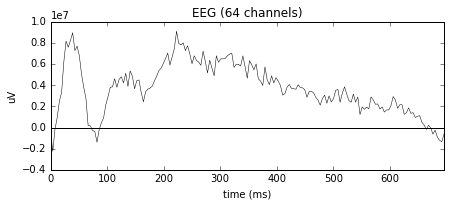

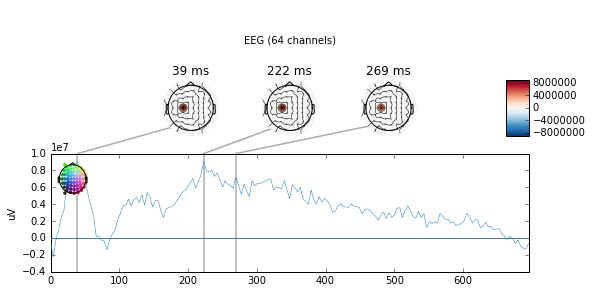

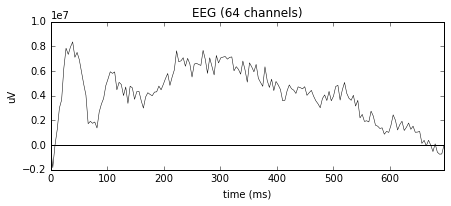

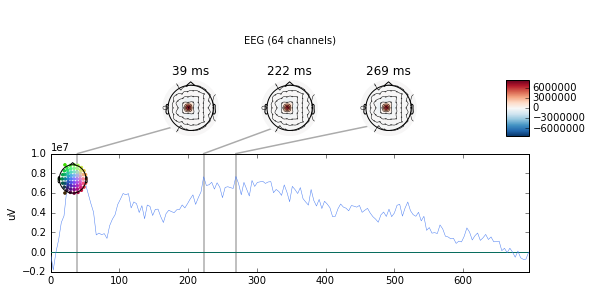

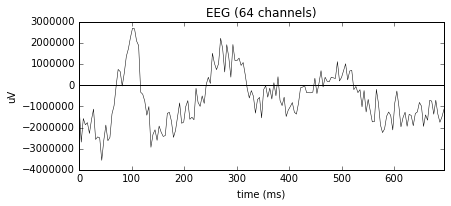

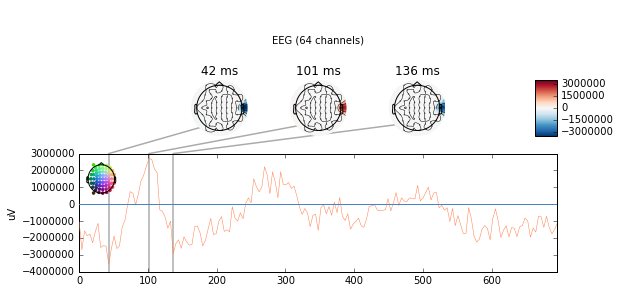

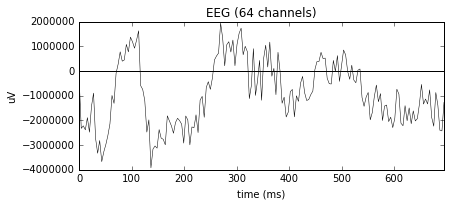

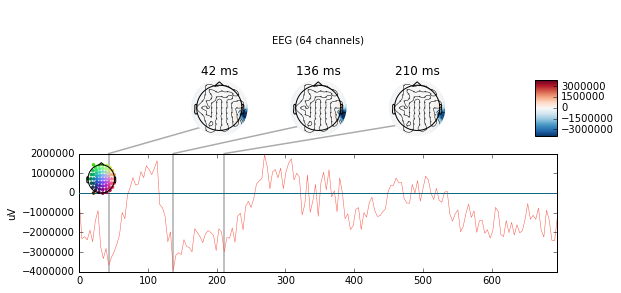

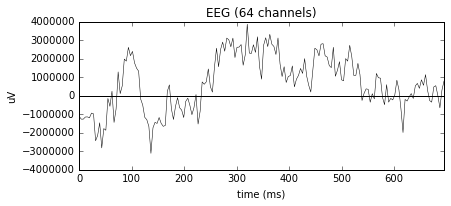

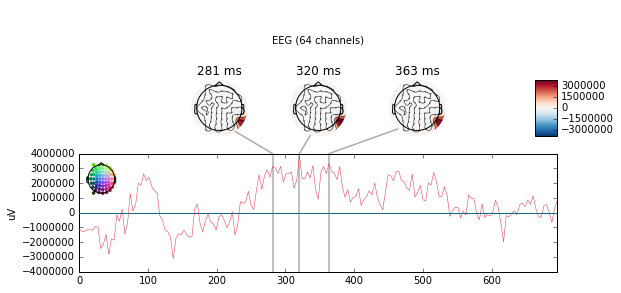

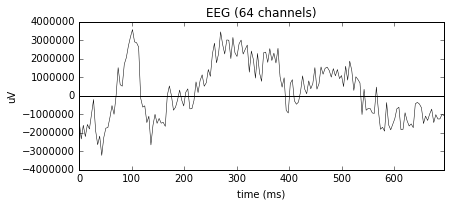

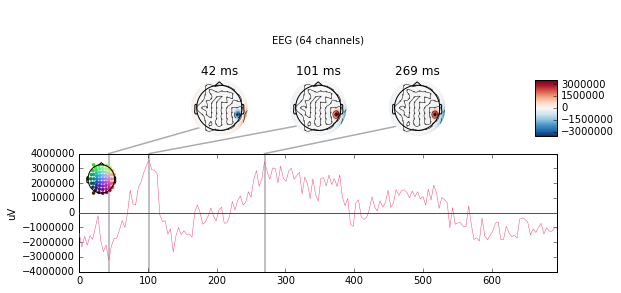

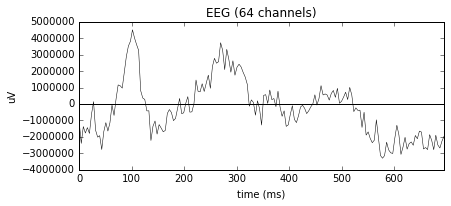

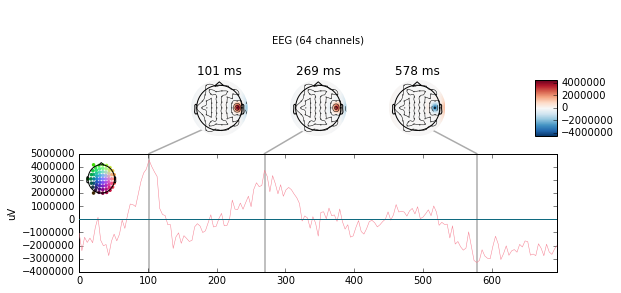

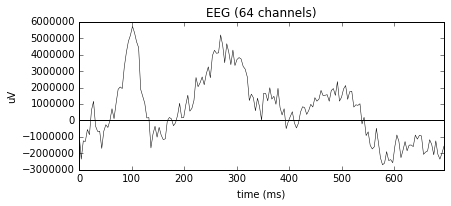

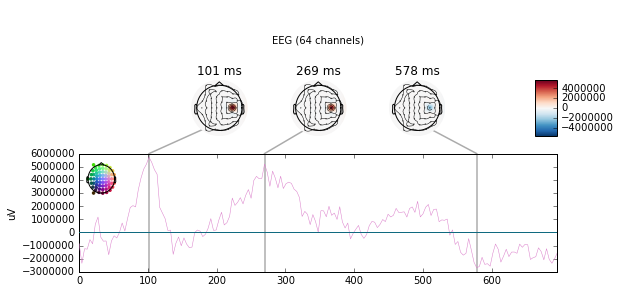

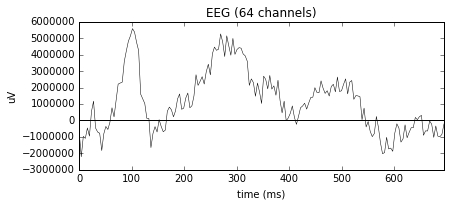

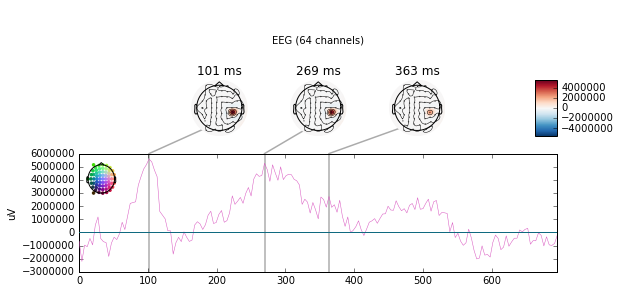

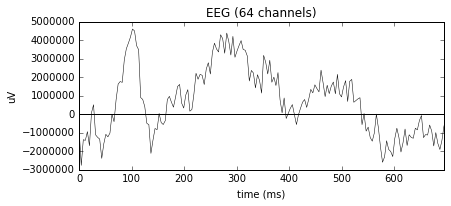

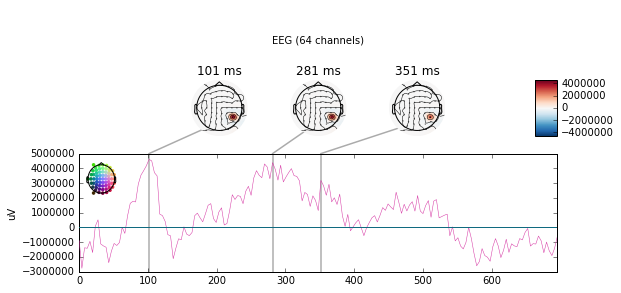

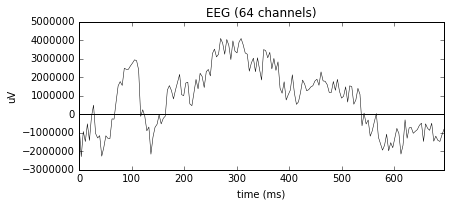

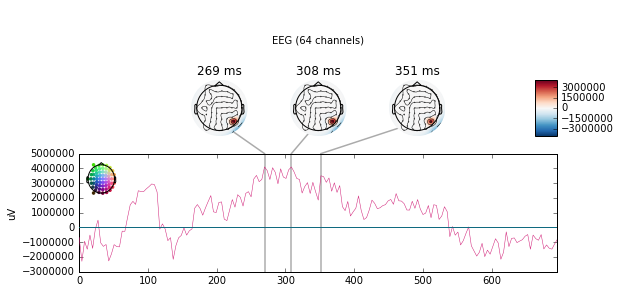

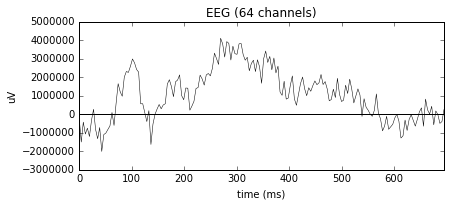

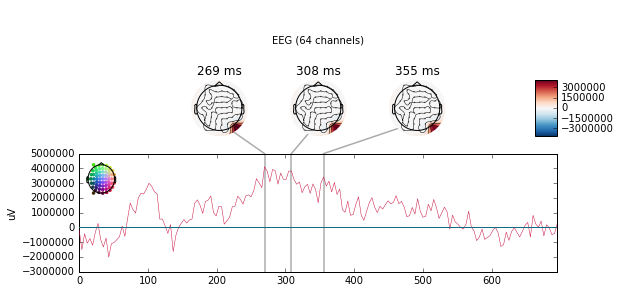

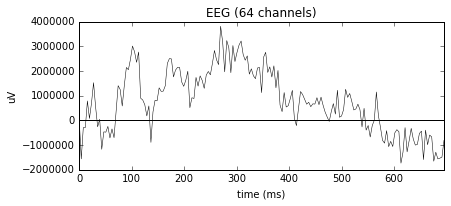

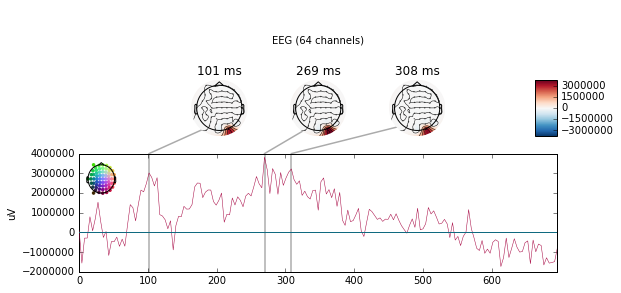

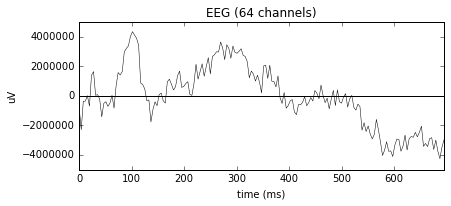

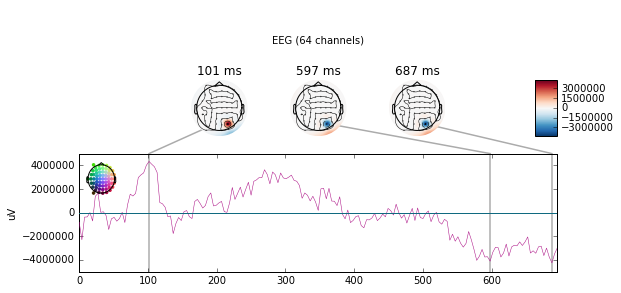

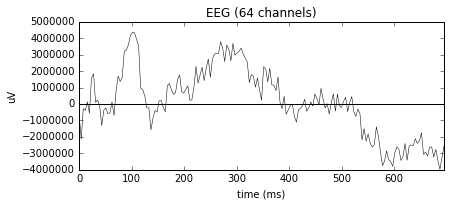

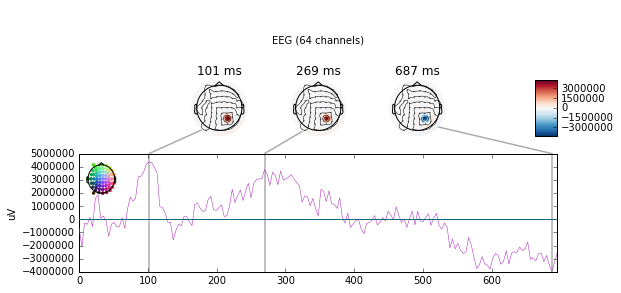

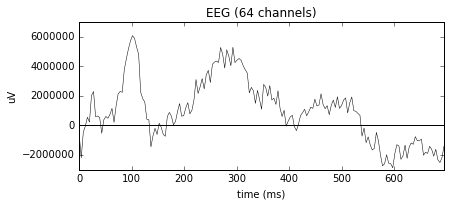

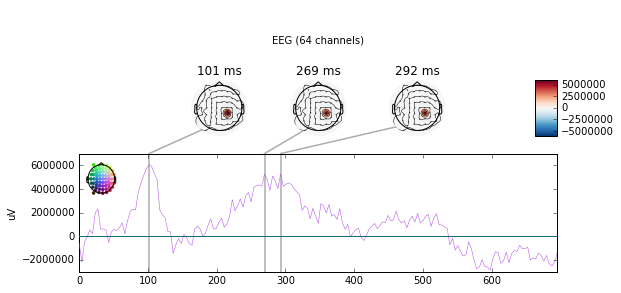

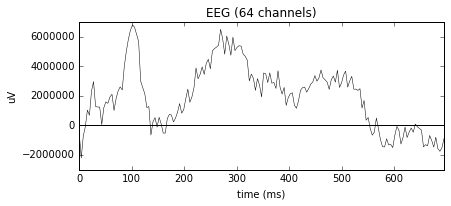

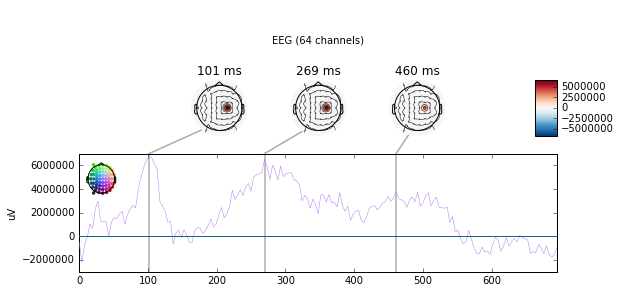

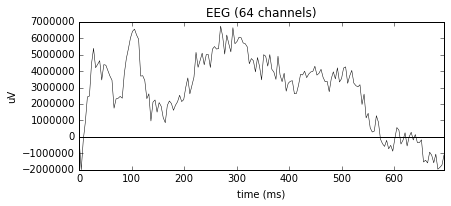

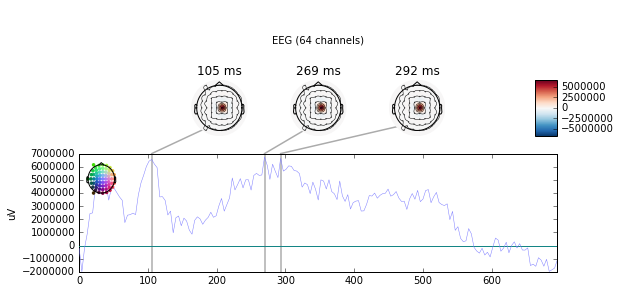

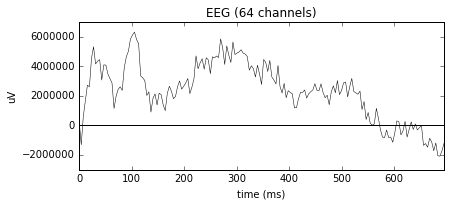

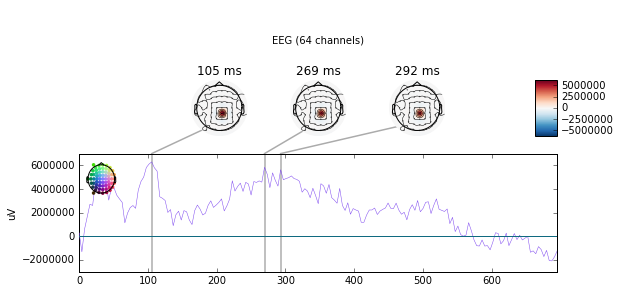

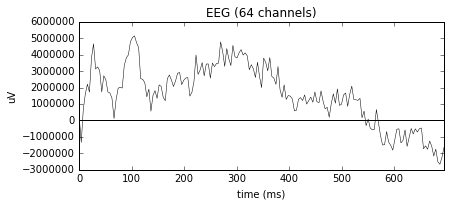

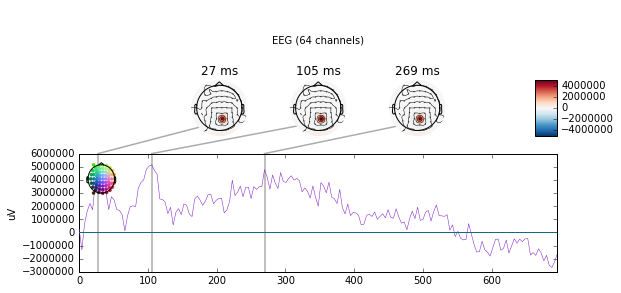

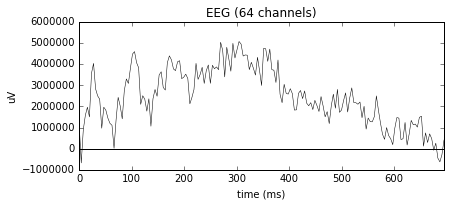

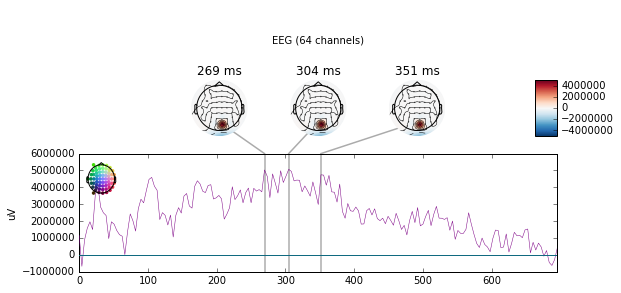

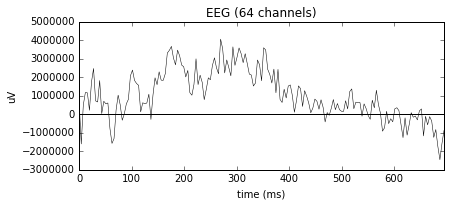

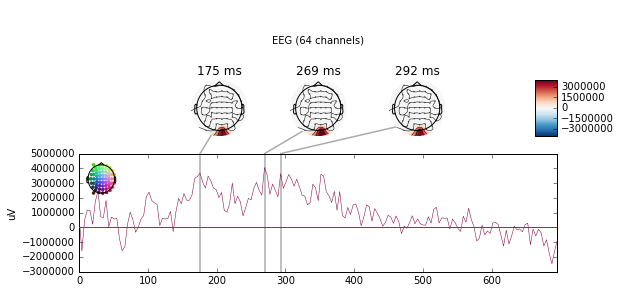

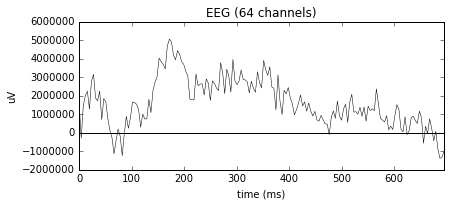

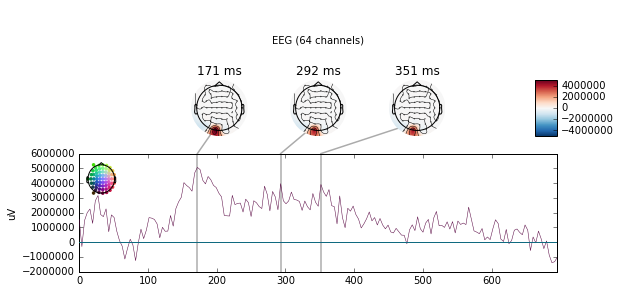

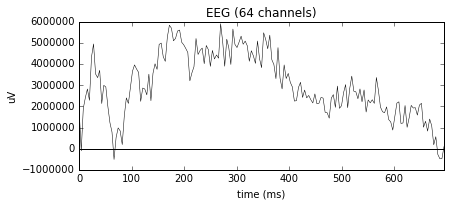

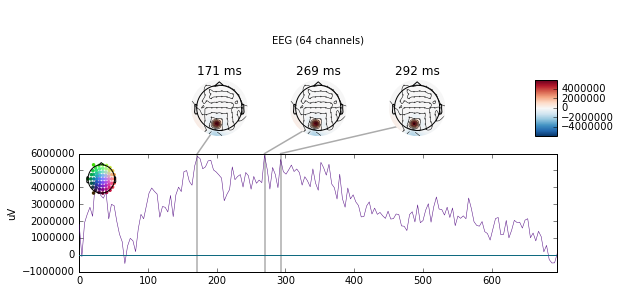

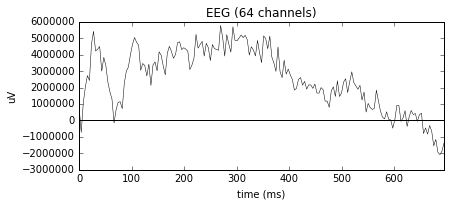

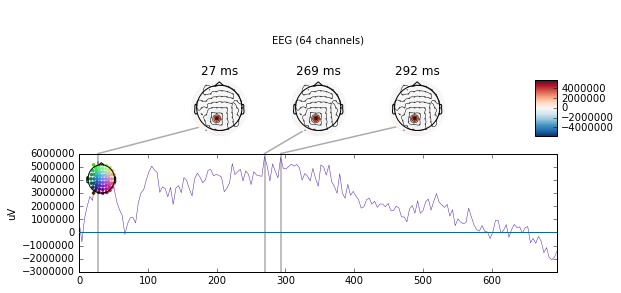

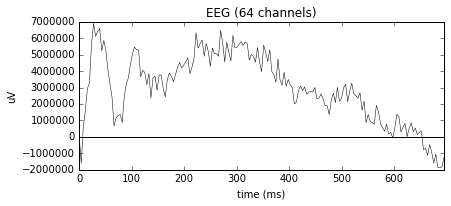

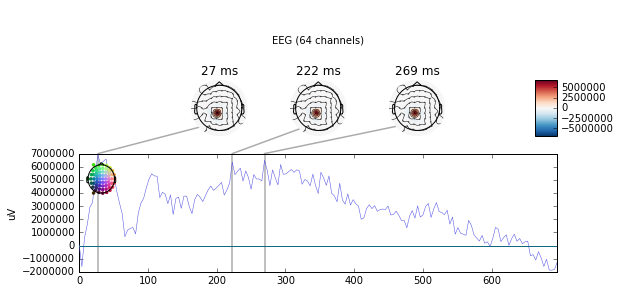

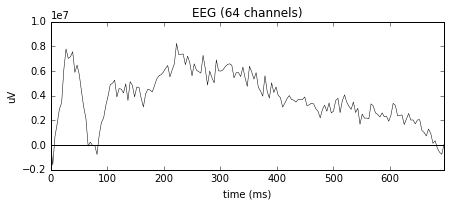

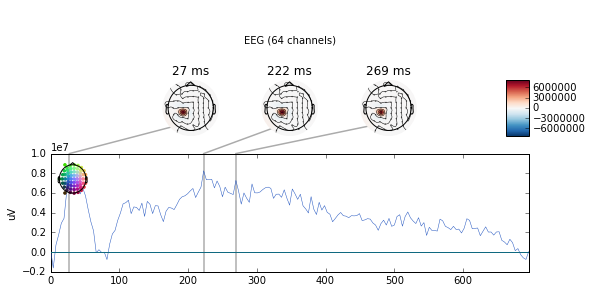

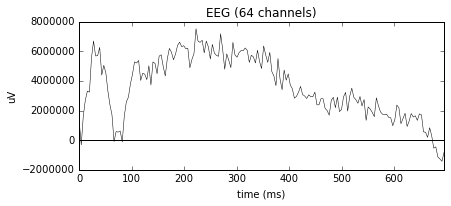

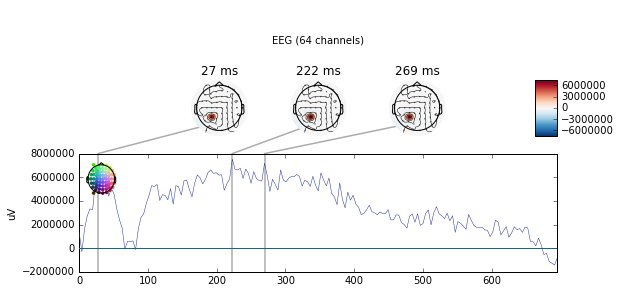

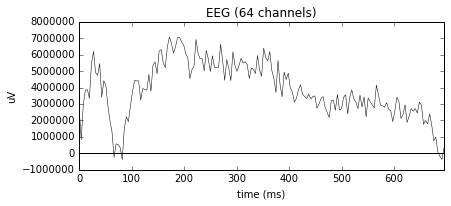

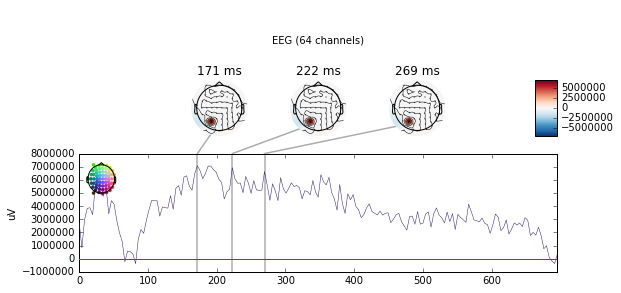

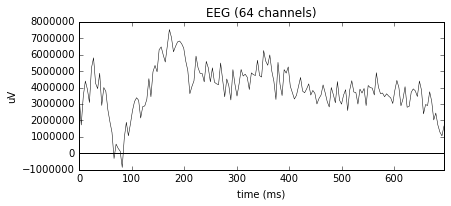

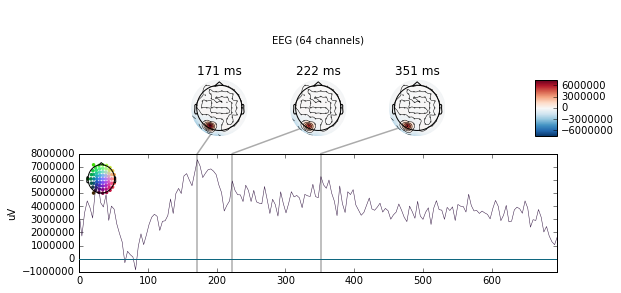

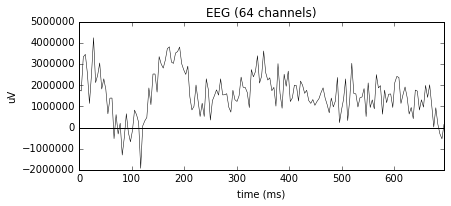

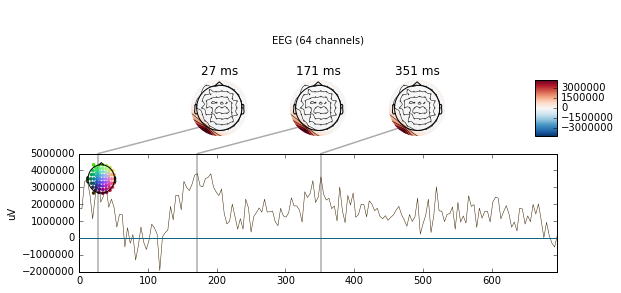

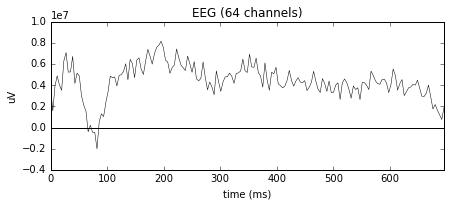

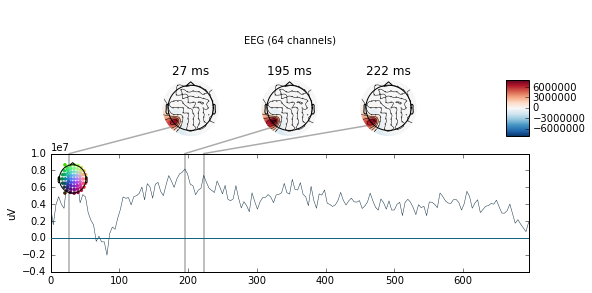

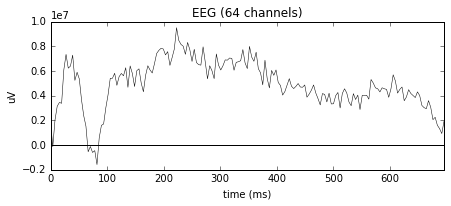

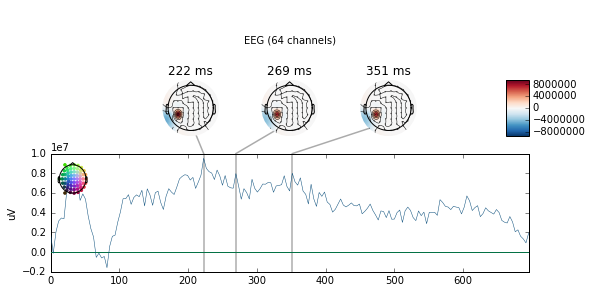

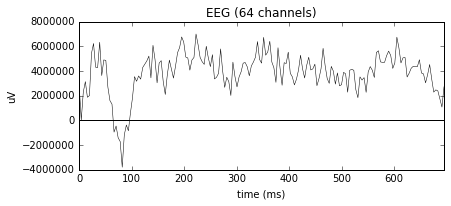

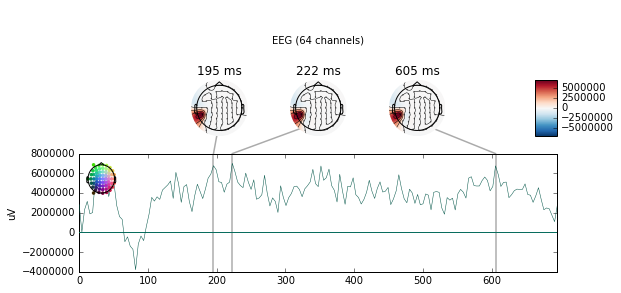

In [7]:
# data3.shape
low, length = int(0.1 * sfreq), int(0.8 * sfreq)
peak_times = []
# low, length
data5 = data3[:, low: (low + length)]
# data5.shape
# for each in data5:
# #     print(each.max())
#     idx = each.argmax()
#     peak_times.append(idx)

# peak_times = np.array(peak_times, dtype=float)
# peak_times.shape
times = np.arange(0.0, 0.79, 0.1)
for idx in range(data5.shape[0]):
    data5_ = np.zeros_like(data5)
    # data5_.shape, data5.shape, data5_[0].shape, data5[0].shape
    data5_[idx] = data5[idx]
    evoked = mne.EvokedArray(data=data5_, info=info)
    evoked.plot(picks=picks)
    evoked.plot_joint() # times=times
#     evoked.plot_topomap(times=times)

c) Repeat step (a) by applying large Laplacian filter.

Compare step (c) with step (a) and clearly explain your observations and comments 
(hint: To obtain the distance
and the surrounding electrodes, transfer the polar coordinates in eloc64C2.txt file into Cartesian.
                                                                                   
Then for each electrode of interest keep those electrodes that are in radius [0.18 0.28], 
remove the rest, continue obtaining your weights, and then the Laplacian filtered signal). 

(Note: Make the colormaps in ‘jet’ format and keep the color limit for all the topoplots and for
each section the same).

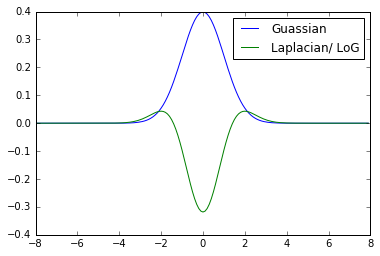

In [8]:
# Display the histogram of the samples, along with the probability density function:
import matplotlib.pyplot as plt
# >>> 
loc, scale = 0., 1.
# s = np.random.laplace(loc, scale, 1000)

# count, bins, ignored = plt.hist(s, 30, normed=True)
# >>> 
x = np.arange(-8., 8., 0.1)
# >>> 
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
# >>> 
# Plot Gaussian for comparison:

# >>> 
g = (1/(scale * np.sqrt(2 * np.pi)) * np.exp(-(x - loc)**2 / (2 * scale**2)))
# >>> 

def laplacian(x, loc, scale):
    a = -(1/ ((scale**4) * np.pi))
    b = (x - loc)**2 / (2 * (scale**2))
    return a * (1 - b) * np.exp(-b)

out = laplacian(loc=loc, scale=scale, x=x)

# plt.plot(x, pdf)
# plt.plot(x, g)

plt.plot(x, g, label='Guassian')
plt.plot(x, out, label='Laplacian/ LoG')
# plt.plot(x, pdf, label='pdf')
plt.legend()
plt.show()
# x.shape
# x

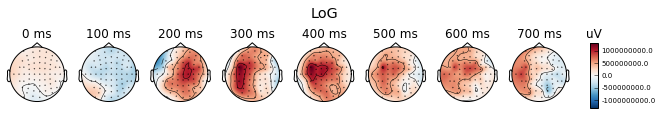

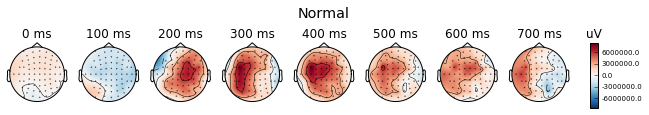

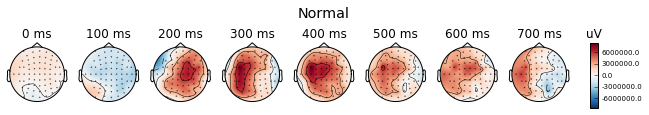

In [9]:
# # Spatial filtering: NxCxHxW, 
# # N=1: since it is only one filter Laplacian
# # C == H == W, since it is based a neighborhood radius which is circle/ sphere.
# # eeg['ref'], data3.shape
# # The radius of the neighborhood is [0.18, 0.28] ==  kernel/ filter window size [18, 28]
# #  Max radius is 28, radius 28**2
# length = ((2 * 28) + 1)
# kernel = np.random.laplace(loc=0.0, scale=1.0, size=(length, length, length)) # 1 at the center and (14, 14, 14)

# kernel.shape, kernel.dtype, kernel.argmax()
# Let's extract the neighborhood for each channel/ electrod based their spatial radius
# for ch_location
# ch_location.shape
# np.square(ch_location[0] - ch_location[1]).shape
# Least square Error or Least square-root of Error
# The result of spatial of convolution over all the channels
data_conv = []
for idx_loc in range(ch_location.shape[0]): # ch_location.shape[0] # the central channel
# for idx_loc in range(1): # ch_location.shape[0] # the central channel
    W_ref = laplacian(loc=ch_location[idx_loc], scale=0.28, x=ch_location[idx_loc])
    W_ref = W_ref.sum(axis=0)
#     print(W_ref)
    # Weighted ref
    y_ref = W_ref * data3[idx_loc]
#     print('y_ref.shape', y_ref.shape)
    y_res = 0
    
    # Looking for the spatially nearby channels and measure their laplacian weights: 1xn
    for idx_x in range(ch_location.shape[0]): # nearby channels
        dist = np.sqrt(np.sum(a=np.square(ch_location[idx_x] - ch_location[idx_loc]), 
                              axis=0, dtype=float))/ 100 # centi meters: % meter
        dist2 = ((np.sum((ch_location[idx_x] - ch_location[idx_loc])**2, axis=0))**0.5) / 100 # centimeters
#         print(dist, dist2, dist-dist2)
        # The radiia of locality
        if dist > 0.18 and dist < 0.28:

#         if dist < 0.18:

#         if dist < 0.28:

#             print(dist)
            W = laplacian(loc=ch_location[idx_loc], scale=0.18, x=ch_location[idx_x])
            W = W.sum(axis=0)
#             print(W)
            # sum of weighted input: summing the weighted input channels: 1xn
            y_res += W * data3[idx_x]
#             print('y_res.shape', y_res.shape)
            
    # At the end, y_ref - y_res
    out = -(y_ref - y_res)
#     print(out.shape)
    data_conv.append(out)

data6 = np.array(data_conv, dtype=float)
data6.shape

evoked = mne.EvokedArray(data=data6, info=info)

evoked_normal = mne.EvokedArray(data=data3, info=info)

# evoked.times = times
times = np.arange(0.0, 0.79, 0.1)
evoked.plot_topomap(times=times, title='LoG')
evoked_normal.plot_topomap(times=times, title='Normal')